# BSc PHYS60022 - Data Science and Machine Learning - Afternoon Session

This is the notebook for the afternoon session of the practical test for the FHEQ Level 6 course PHYS60022 - Data Science and Machine Learning for Physics (Spring 2025).

You will need to have the files `CMS_ttbar_data_afternoon.csv` and `CMS_tprime_signal.csv` in the same directory as this notebook. Note that these files are different from the file you used in the morning session. 

The questions for the afternoon session are in this notebook.

<hr style="border:2px solid gray">
<a id='instructions'></a>

# Instructions  [^](#outline)

#### Claim this file

1. Rename this file by adding your CID number to the file name.
1. Add your CID number in the Markdown cell box below.

**To retain anonymity we ask you not to add your name here or to the name of the file.**

#### CID: 02239985 

<div style="background-color: #FFEEEC">
    
# INFORMATION FOR ALL AFTERNOON QUESTIONS [^](#outline)

### Total marks for this session: 65

## Background

This afternoon's exercises will take the same physics scenario as this morning. You will examine your data to see if it contains evidence of a new 'beyond the standard model' (BSM) particle called a '$T^{\prime}$' (pronounced T prime) or is well described by just the standard model (SM) processes that you studied this morning. A repeat of the relevant background information for the morning session is given below for context, followed by a description of the $T^{\prime}$ process and the data for this afternoon's exercises.

## Repeat of Relevant Morning Background

Your colleagues working on the CMS experiment at CERN have collected a large data sample of proton-proton collisions and would like you to perform some statistical analyses on them. They have provided you with data files containing all of the data needed for this work. Your colleagues have selected the events to send you based on some simple requirements to make sure that the data is good quality and that the events contain certain particles that are consistent with the reaction $pp\rightarrow t\bar{t}\rightarrow (b\mu\nu_{\mu})(bq\bar{q})$. In these collisions, it is possible to produce pairs of top anti-top quarks ($t\bar{t}$). Each of these top quarks decays quickly to a $b$ quark and a $W$ boson. One of the $W$ bosons decays to a muon ($\mu$) and muon neutrino $\nu_{\mu}$ while the other one decays to a quark and an anti-quark $q\bar{q}$. We will refer to this process as `ttbar` in the rest of this notebook. The Feynman diagram below shows this process,


![](ttbar_diagram.jpg)

## Background for the afternoon on the $T^{\prime}$ process

Some extensions to the SM predict that, in addition to the known quarks, there are additional particles called $T^{\prime}$ s. If these particles exist they would be able to produce events in CMS that contain the same particles as the `ttbar` process we studied this morning. The reaction would be $pp\rightarrow T^{\prime}\bar{T^{\prime}}\rightarrow (b\mu\nu_{\mu})(bq\bar{q})$. We will refer to this process as `Tprime` in the rest of the notebook. The Feynman diagram below shows this process,

<img src="TprimeTprime.jpg" alt="Sample Image" style="width:50%; height:auto;">

## The Data for This Afternoon

You have two data files for this afternoon's exercise. Both are in the form of a `.csv` file where each row corresponds to one proton-proton collision event. The first file - `CMS_ttbar_data_afternoon.csv` - has an identical structure to the file from this morning containing data and simulated events, but it also has a column filled with an invariant mass variable similar to the one you constructed this morning, but using the latest and greatest calibrations. This is present in your files as `top_jet_mass`. **You must use this file and not the one from this morning to ensure that any mistakes in your code from this morning do not cause problems for you this afternoon**. The second file - `CMS_tprime_signal.csv` - contains simulated events coming from the decay of the BSM `Tprime`.

As a reminder the `CMS_ttbar_data_afternoon.csv` file contains both real data from collision events, as well as simulated data from both `ttbar` and background processes. The `label` column in the dataset indicates whether the event is a real data event or a simulated event, and if the latter which kind of process has been simulated. All events in `CMS_tprime_signal.csv` are simulated events coming from the decay of the BSM `Tprime` but they still contain the `label` column. The labels assigned to each process are summarised in the table below.

  
| Data or simulation  | Process         | Label      |
| ---------           | -------         | -------    |
| Real Data           | N/A             | 0          |
| Simulation          | ttbar           | 1          |
| Simulation          | background      | 2-5        | 
| Simulation          | Tprime          | 6          | 



# Event information 

The different columns in both of the `.csv` files provide measurements of the kinematic properties of the different particles in the collision event in the form of the elements of particle four-vectors $p_{x},p_{y},p_{z},E$. For example, for the muon, you will find `muon_px, muon_py, muon_pz, muon_E`.

The $b$ and $q$ particles are not easy to reconstruct in a detector like the CMS experiment, but instead, sophisticated clustering algorithms are used to estimate the momentum and energy of those particles. Your CMS colleagues refer to the results of those algorithms as "jets" and the columns `jetX_px, jetX_py, jetX_pz, jetX_E` give the four-momenta for jets in the event (there are a total of four of them, so `X`=1,2,3 or 4). For these jets, there is also a property called `jetX_btag` which corresponds to a probability, calculated using a machine learning algorithm, that the jet originates from  $b$ quark rather than a different quark. 

In experiments like CMS, it is impossible to reconstruct the neutrino, since it doesn't interact before flying all the way through the detector. Instead, we can infer something about its momentum by adding all of the momenta transverse to the proton collision line, from all particles in the event. Since the protons are colliding head on, we expect this momentum to sum to zero. Anything left over indicates the presence of a neutrino. This is called `met` in your dataset.

As described above, the invariant mass variable is called `top_jet_mass` in your dataset.

All momentum and energy quantities are given in units of GeV (i.e. natural units where $c=1$). 

Each of the simulated events comes with a weight in the column `weight` that must be accounted for - you can think of a weight being 2 meaning that rather than generating two events, we generate one event and give it the weight of 2 events (don't worry too much about what it means to have fractional weights!). The data events always have a weight of 1. 

<div style="background-color: #FFEEEC">

# QUESTION 4 [^](#outline)
    
[TOTAL MARKS 24]

<div style="background-color: #FFEEEC">

## Read in the data

Read in the data from the two files. 

To read a file called `file.csv`, You should use something like the following code:-
```
import pandas as pd    
df = pd.read_csv('file.csv')
```
This code gives a pandas dataframe `df`. 

In [2]:
# Read in the data

import pandas as pd    
df_tprime = pd.read_csv('CMS_tprime_signal.csv')

df_ttbar = pd.read_csv('CMS_ttbar_data_afternoon.csv')


<div style="background-color: #FFEEEC">

## QUESTION 4.1
 (i) What is the main advantage of a model-based approach like a decision tree over instance-based approaches for large datasets?

 (ii) What is the main problem with using a basic decision tree on complex training data?

 (iii) What is the process of iteratively training a series of 'weak learners' on the residual between your target data and the model from the previous iteration called?
 
 (iv) What is a cutting edge implementation of the method described in (iii) that you have covered on this course?
    
[Marks 4]
 

i) Decision trees produce an explicit model during training that can be quickly evaluated on new data. However, instance-based approaches store all the data and must compare to many points during prediction, which becomes very slow for large datasets.

ii) Basic decision trees are prone to overfitting. This is because can keep splitting the data until each training example is perfectly classified. As a result, this leads to a tree that memorises noise and does not generalise well to unseen data.

iii) Boosting

iv) XGBoost



<div style="background-color: #FFEEEC">

## QUESTION 4.2 [^](#outline)

Build, train and test a decision tree to classify your events into those coming from the `Tprime` process and everything else. This is a binary classification task, you will need to do something to account for your 'everything else' events having several different label values. You should ignore the data events for now, only training on the simulated events.
* You should use an up to date  decision tree method covered on this course not a basic decision tree.
* You should aim to find the best results you can e.g. by varying the hyperparameters. 
    * You should carry out a systematic scan of values of at least 4 hyperparameters of this model. Try at least 3 different values of every hyperparameter.
    * Remember this may take some time to train, you can work on other parts of the test, e.g. question 6, while this training progresses.
* You should use ROC_AUC and at least one other performance metric to measure the effectiveness of any results. 
    * If you can use more metrics easily, then do so.  
* You should not use the following features to train: `weight`, `label`, `jet1_real_b`, `jet2_real_b`, `jet3_real_b`, `jet4_real_b`, `top_jet_mass`.

Note clearly the best set of hyperparameters. 

In this part of question 4, you need only show your code. You must make it clear in your comments what you are doing and why.

[Marks 10]

In [ ]:
# --- IMPORTS ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from xgboost import XGBClassifier
import pickle


# COMBINING THE SIMULATED DATASETS
# Exclude real data events
df_sim = df_ttbar[df_ttbar['label'] != 0]

df_all_sim = pd.concat([df_sim, df_tprime])

# CREATE BINARY LABELS 
df_all_sim['binary_label'] = (df_all_sim['label'] == 6).astype(int)

# REMOVE UNWANTED COLUMNS
features_to_drop = ['weight', 'label', 'top_jet_mass', 
                    'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b']
X = df_all_sim.drop(columns=features_to_drop + ['binary_label'])
y = df_all_sim['binary_label']

# SPLITTING THE DATA INTO TRAINING AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# HYPERPARAMETERS
list_of_max_depth = [2, 5, 10]
list_of_max_leaves = [10, 50, 100]
list_of_learning_rate = [0.01, 0.05, 0.1]
list_of_n_estimators = [50, 100, 200]

list_of_hparams = [(d, l, lr, n) for d in list_of_max_depth 
                                 for l in list_of_max_leaves 
                                 for lr in list_of_learning_rate 
                                 for n in list_of_n_estimators]

# RESULTS 
results_df = pd.DataFrame(columns=['max_depth','max_leaves','learning_rate', 'n_estimators', 'accuracy', 'cv_score', 'auc_score'])

# TRAINING AND EVALUATING THE MODEL
best_cv = 0
best_cv_model = None

best_accuracy = 0
best_accuracy_model = None

best_auc = 0
best_auc_model = None

# Loop through all combinations of hyperparameters
for max_depth, max_leaves, learning_rate, n_estimators in list_of_hparams:
    clf = XGBClassifier(max_depth=max_depth,
                        max_leaves=max_leaves,
                        learning_rate=learning_rate,
                        n_estimators=n_estimators,
                        random_state=1,
                        verbosity=0,
                        use_label_encoder=False)
    clf.fit(X_train, y_train)
    
    # Evaluate the model
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    y_score = clf.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_score)

    # Save best model for each metric
    if cv_score > best_cv:
        best_cv = cv_score
        best_cv_model = clf

    if acc > best_accuracy:
        best_accuracy = acc
        best_accuracy_model = clf
    
    if auc_score > best_auc:
        best_auc = auc_score
        best_auc_model = clf

    # Store results
    model_df = pd.DataFrame(np.array([[max_depth, max_leaves, learning_rate, n_estimators, acc, cv_score, auc_score]]),
                            columns=results_df.columns)
    results_df = pd.concat([results_df, model_df])

#DISPLAY RESULTS
display(results_df)


C:\Users\ac5222\AppData\Local\Temp\ipykernel_20068\1265048844.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, model_df])


,max_depth,max_leaves,learning_rate,n_estimators,accuracy,cv_score,auc_score
0,2.0,10.0,0.01,50.0,0.907299,0.907489,0.959782
0,2.0,10.0,0.01,100.0,0.907299,0.907489,0.964338
0,2.0,10.0,0.01,200.0,0.936153,0.936043,0.968396
0,2.0,10.0,0.05,50.0,0.943740,0.943063,0.970290
0,2.0,10.0,0.05,100.0,0.957065,0.957012,0.977040
...,...,...,...,...,...,...,...
0,10.0,100.0,0.05,100.0,0.965500,0.965668,0.984803
0,10.0,100.0,0.05,200.0,0.968534,0.968792,0.987279
0,10.0,100.0,0.10,50.0,0.965424,0.965662,0.984707
0,10.0,100.0,0.10,100.0,0.968568,0.968614,0.987215


In [ ]:
best_acc = results_df.sort_values('accuracy', ascending=False).head(1) #[1]
best_cv = results_df.sort_values('cv_score', ascending=False).head(1)
best_auc = results_df.sort_values('auc_score', ascending=False).head(1)

best_combined = pd.concat([best_acc, best_cv, best_auc])
best_combined.reset_index(drop=True, inplace=True)

print("Best hyperparameters based on Accuracy, CV Score, and ROC-AUC:")
print(tabulate(best_combined, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".3f"))

#[1] method from chatgpt


Best hyperparameters based on Accuracy, CV Score, and ROC-AUC:
╒═════════════╤══════════════╤═════════════════╤════════════════╤════════════╤════════════╤═════════════╕
│   max_depth │   max_leaves │   learning_rate │   n_estimators │   accuracy │   cv_score │   auc_score │
╞═════════════╪══════════════╪═════════════════╪════════════════╪════════════╪════════════╪═════════════╡
│      10.000 │      100.000 │           0.100 │        200.000 │      0.970 │      0.970 │       0.988 │
├─────────────┼──────────────┼─────────────────┼────────────────┼────────────┼────────────┼─────────────┤
│      10.000 │      100.000 │           0.100 │        200.000 │      0.970 │      0.970 │       0.988 │
├─────────────┼──────────────┼─────────────────┼────────────────┼────────────┼────────────┼─────────────┤
│      10.000 │      100.000 │           0.100 │        200.000 │      0.970 │      0.970 │       0.988 │
╘═════════════╧══════════════╧═════════════════╧════════════════╧════════════╧═══════════

<div style="background-color: #FFEEEC">

## QUESTION 4.3 [^](#outline)

In question 4.2, you built, trained and tested a classifier for our data using a decision tree. For this method discuss the following.
    
Based on the results you have shown, which hyperparameter values would you choose to best classify the data? Include your chosen values in your answer and explain why you chose those values. Refer back to any plots and data you have produced above. Your answer should include:    
* The performance metrics you used and how you interpreted them. 
* Training vs Test loss and a justification for why your chosen algorithm has not been overfit. 
* Which values you chose for the hyperparameters and why. 
* A ROC curve for the best set of hyperparameters.

[10 marks]
    

Classification accuracy = 97.0%
ROC-AUC score = 0.98848


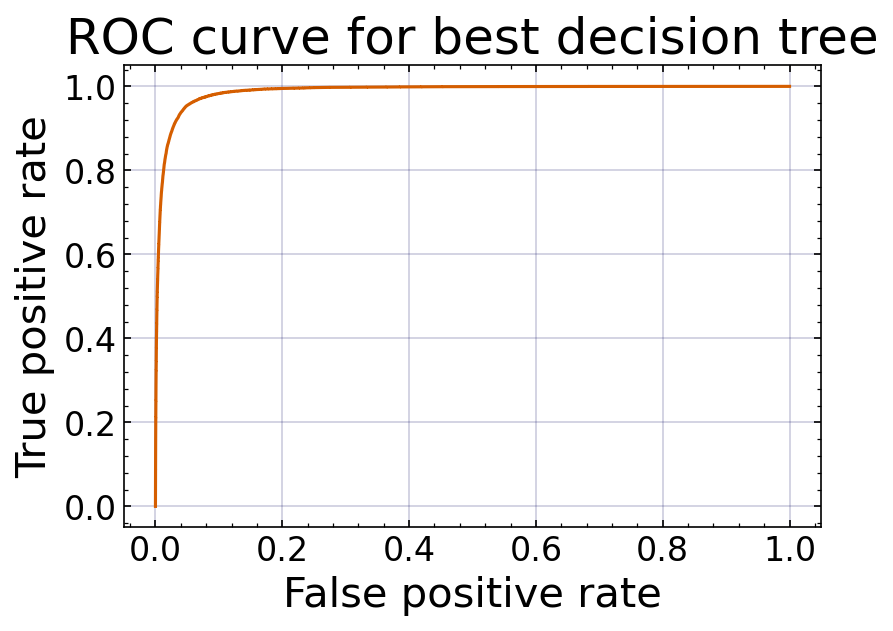

In [15]:
# BEST MODEL BASED ON CROSS VALIDATION SCORE

best_model = best_cv_model

acc = accuracy_score(y_test, best_model.predict(X_test))
roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

print('Classification accuracy = {:.1f}%'.format(acc*100))
print('ROC-AUC score = {:.5f}'.format(roc))

# ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate', fontsize=20)
ax.set_ylabel('True positive rate', fontsize=20)
ax.set_title('ROC curve for best decision tree', fontsize=24)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both', direction='in', top=True, right=True, labelsize=16)
ax.grid(color='xkcd:dark blue', alpha=0.2)


In [16]:
# TRAINING AND TEST LOSSES

train_preds = best_model.predict(X_train)
train_proba = best_model.predict_proba(X_train)[:, 1]
test_preds = best_model.predict(X_test)
test_proba = best_model.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train, train_preds)
train_roc_auc = roc_auc_score(y_train, train_proba)
test_accuracy = accuracy_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_proba)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC-AUC: {train_roc_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")


Training Accuracy: 0.9753
Training ROC-AUC: 0.9922
Test Accuracy: 0.9702
Test ROC-AUC: 0.9885



I varied 4 hyperparameters: max_depth, max_leaves, learning_rate and n_estimators. max_dept was tested at small depths to control how complex the model is and to avoid any overfitting. I tried larger depth of 10 to allow for a deeper model if needed. This is similar to the n_estimators - I varied the number of trees between 50 and 200 as a comprimise between model capacity and the possibility of overfitting.

For each hyperparameter combination, I recorded 3 performance metrics: the test accuracy, the test ROC-AUC and the mean cross-validation. Accuracy measures how many predictions the classifier got correct out of all the predictions made and the ROC-AUC measures the area under the ROC curve which is a plot of the true positive rate against the false positive rate as the classification threshold is varied. A higher accuracy and ROC-AUC score indicates a better ability to classify between classses. The cross-validation score refers to the average accuracy when the training set is split into different folds - the model is trained on some folds and then tested on the ones that we left out. The results are then averaged.

Although I identified the hyperparameters that gave the best performace individually for each metric, I decided to choose my beset model based on the cross-validation score. Since the other metrics rely on the test data, there is the possibility of it learning the dataset and not being able to generalise to unseen data. The cross-validation however does not rely on the test data and will therefore give a better idea into how the model performs overall and avoids building a model which is good for only one specific dataset. In this case, the best cross-validation score also had the best accuracy and ROC! For a future run, I would expand the search to a wider range of hyperparameters since the best I found were at the max/min of my tested hyperparameters. 

This corresponds to the hyperparameters:

- max_depth = 10
- max_leaves = 100
- learning_rate = 0.1 
- n_estimators = 200

These give a mean cv score of  0.970.

To check for overfitting, I compared the training and test performance for the best model. The training and test accuracies were very similar (0.9753 and 0.9702) as were the ROC-AUC scores (0.9922 and 0.9885). This shows that the model is not overfitting the training data and can generalise well to unseen examples.

<hr style="border:2px solid gray">


<div style="background-color: #FFEEEC">

# QUESTION 5 [^](#outline)
    
[TOTAL MARKS 26]

<div style="background-color: #FFEEEC">

## QUESTION 5.1 [^](#outline)

(i) Explain whether this data is more suited to a convolutional or fully connected neural network, and why.

 (ii) Why is it advantageous to train on batches, as in the stochastic gradient descent method, rather than the full dataset?

 (iii) Name two problems that occur when training neural networks with a large number of layers and specify a type of activation function that you've seen in this course that mitigates them.

 (iv) What problems can occur when your input features have different scales, and how can this be mitigated?

    
[Marks 4]

i) The data is more suited to a fully connected neural network. The data is of individual features without a spatial/grid struture. Convolutional neural networks are better for image like data.

ii) Training in batches is preferred because it speeds up the learning process compared to using the full dataset at once.

iii) Vanishing gradients and exploding gradients. The ReLu activation fuction mitigates them (Leaky ReLU/ ELU).

iv) When input features have different scales, features with larger values dominate the learning process. This leads to slower convergence or poor minima. This problem can be mitigated by normalising or standardising the features 

<div style="background-color: #FFEEEC">

## QUESTION 5.2 [^](#outline)
Build, train and test a neural network to classify your events into those coming from the `Tprime` process and everything else. You should ignore the data events for now, only training on the simulated events.
* You should use a method consistent with your answers to question 5.1 that has been covered on this course.
* You must use PyTorch for your neural network and implement a suitable training scheme using PyTorch dataloaders.
* You should aim to find the best results you can e.g. by varying the hyperparameters and architecture. 
    * You should try at least two architectures of network and carry out a systematic scan of values of at least 3 hyperparameters of this model. Try at least 3 different values of every hyperparameter.
    * Remember this may take some time to train, you can work on other parts of the test e.g. question 6 while this progresses
* You should use ROC_AUC and at least one other performance metric to measure the effectiveness of any results. 
    * If you can use more metrics easily, then do so.   
* You should not use the following features to train: `weight`, `label`, `jetX_real_b` , `top_jet_mass`.

Note clearly the best set of hyperparameters. 

In this part of question 5, you need only show your code. You must make it clear in your comments what you are doing and why.

[12 marks]

<div style="background-color: #FFEEEC">

You can use the following code to turn a pandas data frame into a torch tensor dataset:

```
import torch
from torch.utils.data import TensorDataset

dummydf_X=dummydf.drop(columns=['label', 'weight', 'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b','top_jet_mass']) # Remove the information you should not train on

dataset = TensorDataset(torch.Tensor(dummydf_X.values), torch.Tensor(dummydf.label.values))
```

Model 1/8: n=10, sigmoid, lr=0.001, train_acc=0.908, valid_acc=0.907, valid_roc=0.681


Model 2/8: n=10, sigmoid, lr=0.01, train_acc=0.908, valid_acc=0.907, valid_roc=0.500


Model 3/8: n=10, relu, lr=0.001, train_acc=0.908, valid_acc=0.907, valid_roc=0.496


Model 4/8: n=10, relu, lr=0.01, train_acc=0.908, valid_acc=0.907, valid_roc=0.500


Model 5/8: n=30, sigmoid, lr=0.001, train_acc=0.908, valid_acc=0.907, valid_roc=0.706


Model 6/8: n=30, sigmoid, lr=0.01, train_acc=0.908, valid_acc=0.907, valid_roc=0.565


Model 7/8: n=30, relu, lr=0.001, train_acc=0.908, valid_acc=0.907, valid_roc=0.496


Model 8/8: n=30, relu, lr=0.01, train_acc=0.908, valid_acc=0.907, valid_roc=0.500


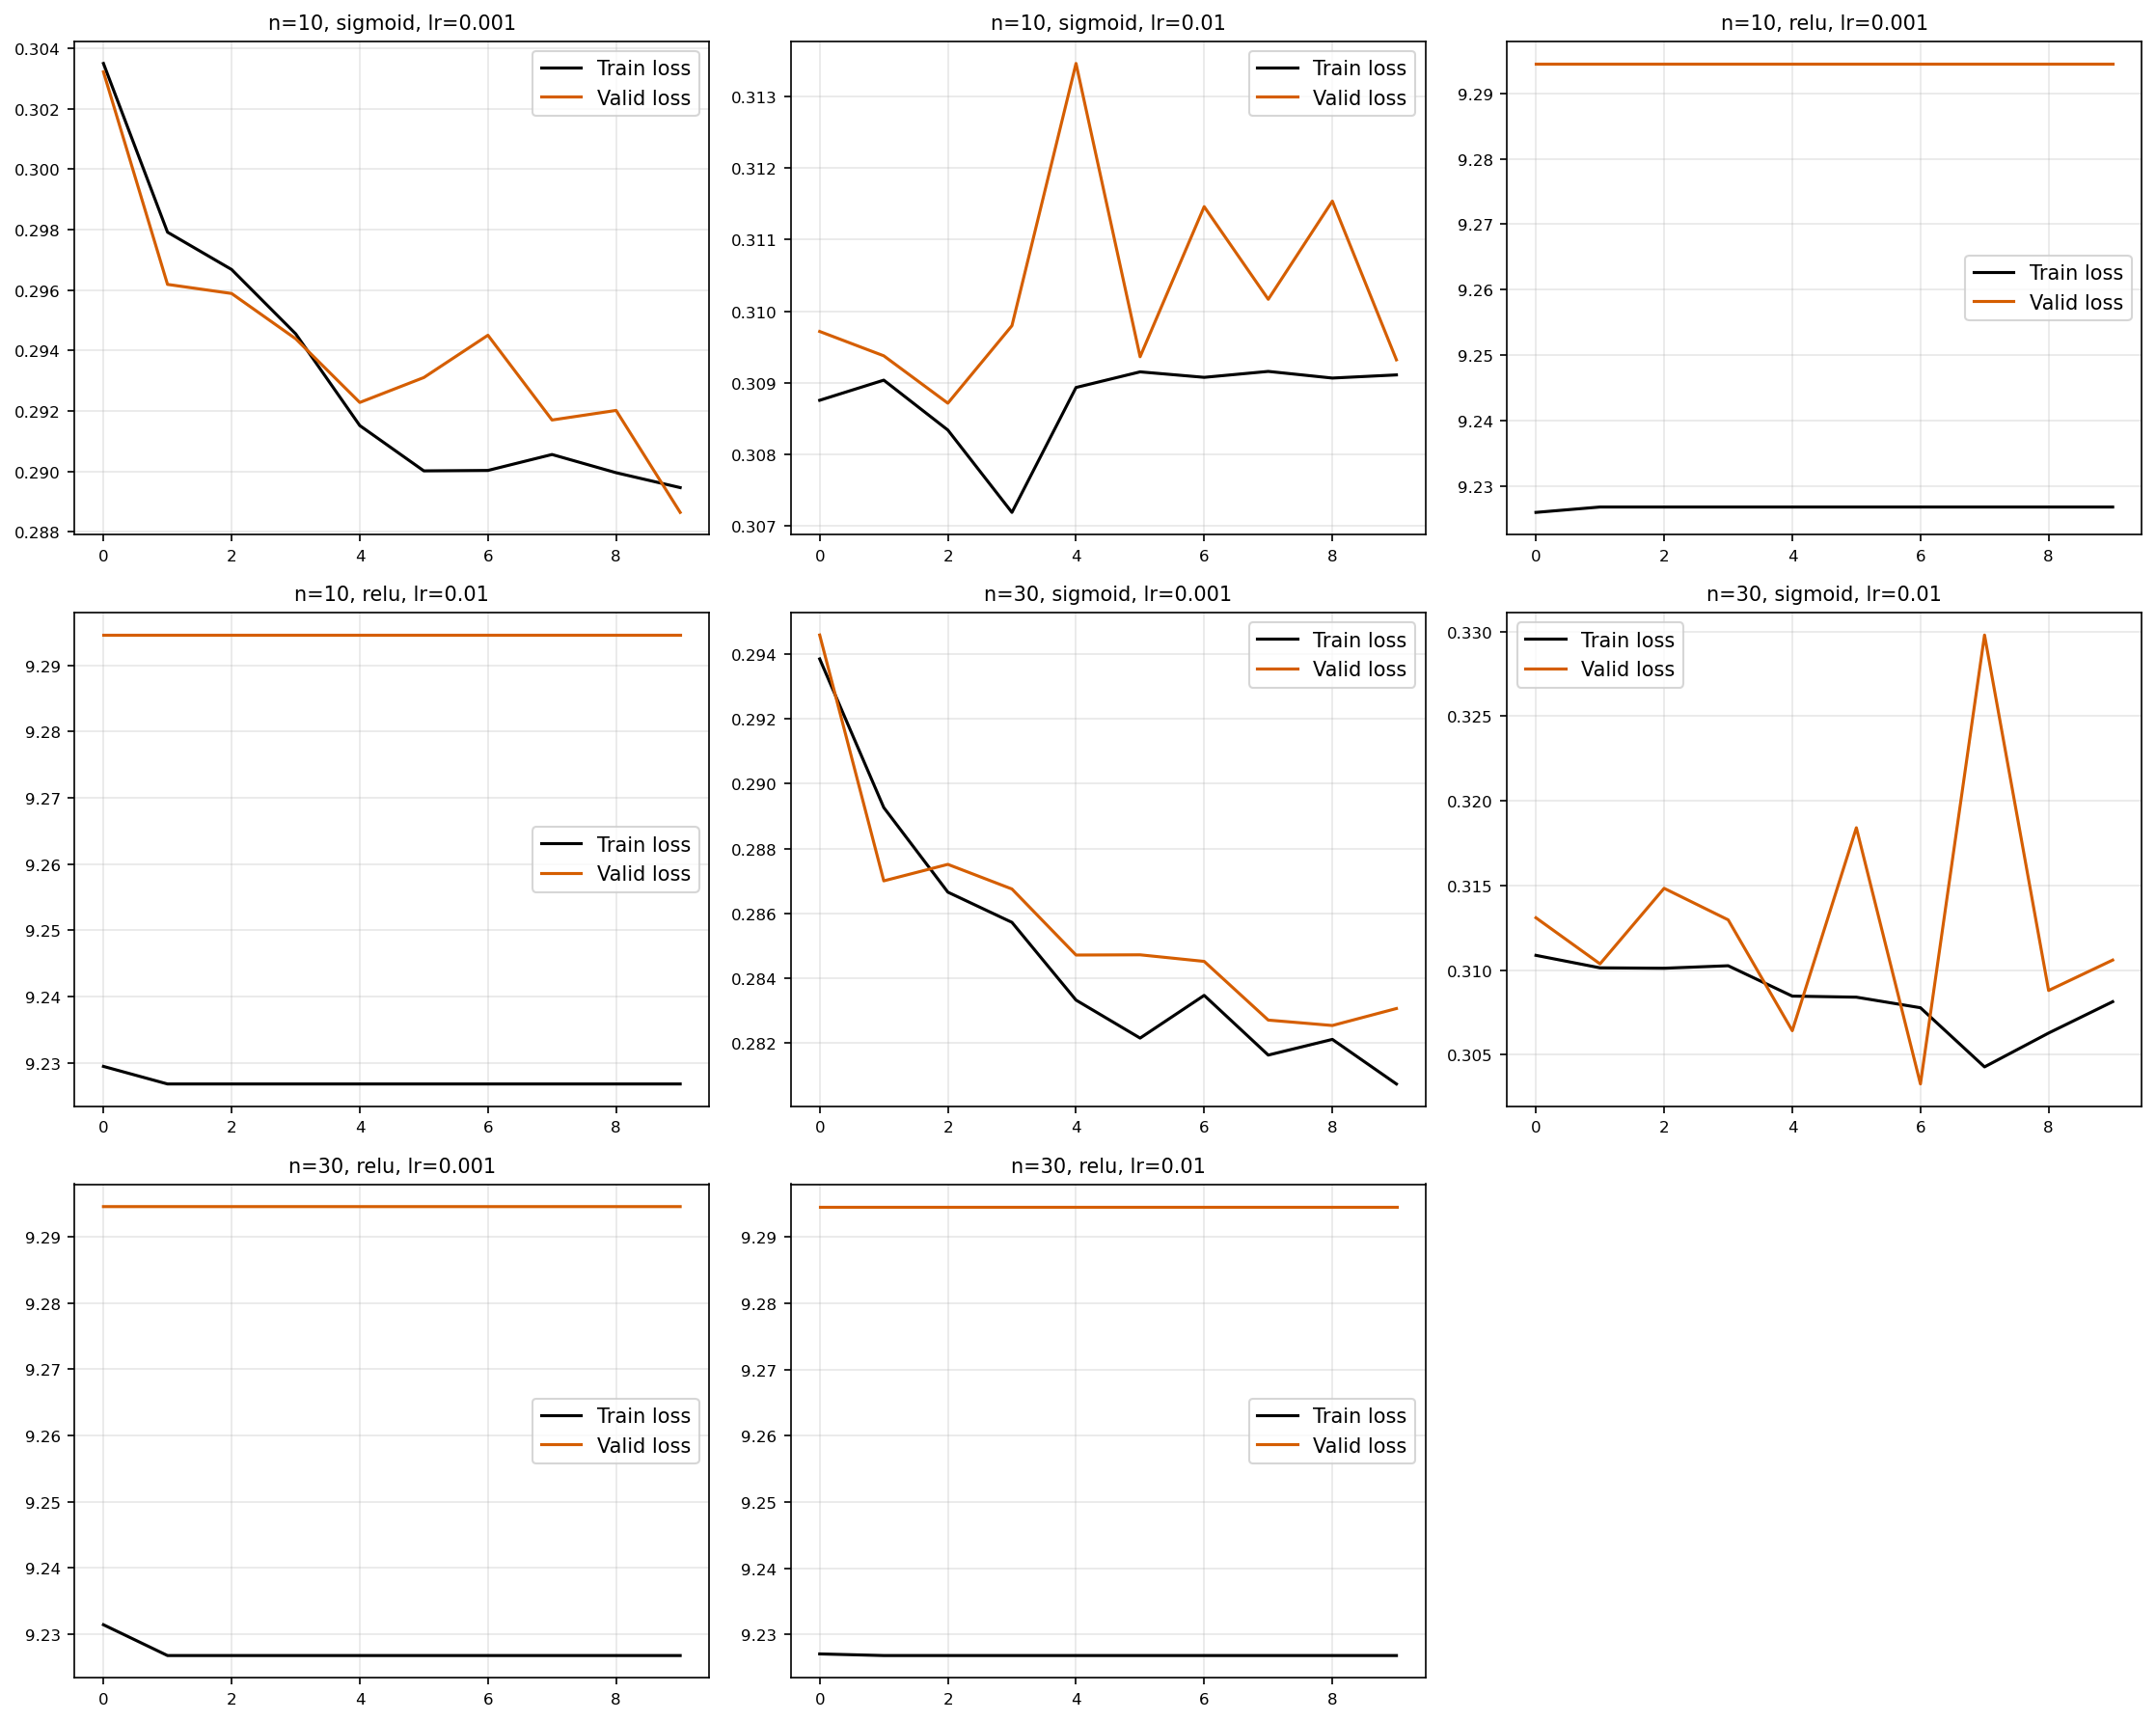

Train accuracy = 90.8%
Validation accuracy = 90.7%
Training ROC-AUC score = 0.709
Validation ROC-AUC score = 0.706
Test accuracy = 90.7%
ROC score = 0.70802


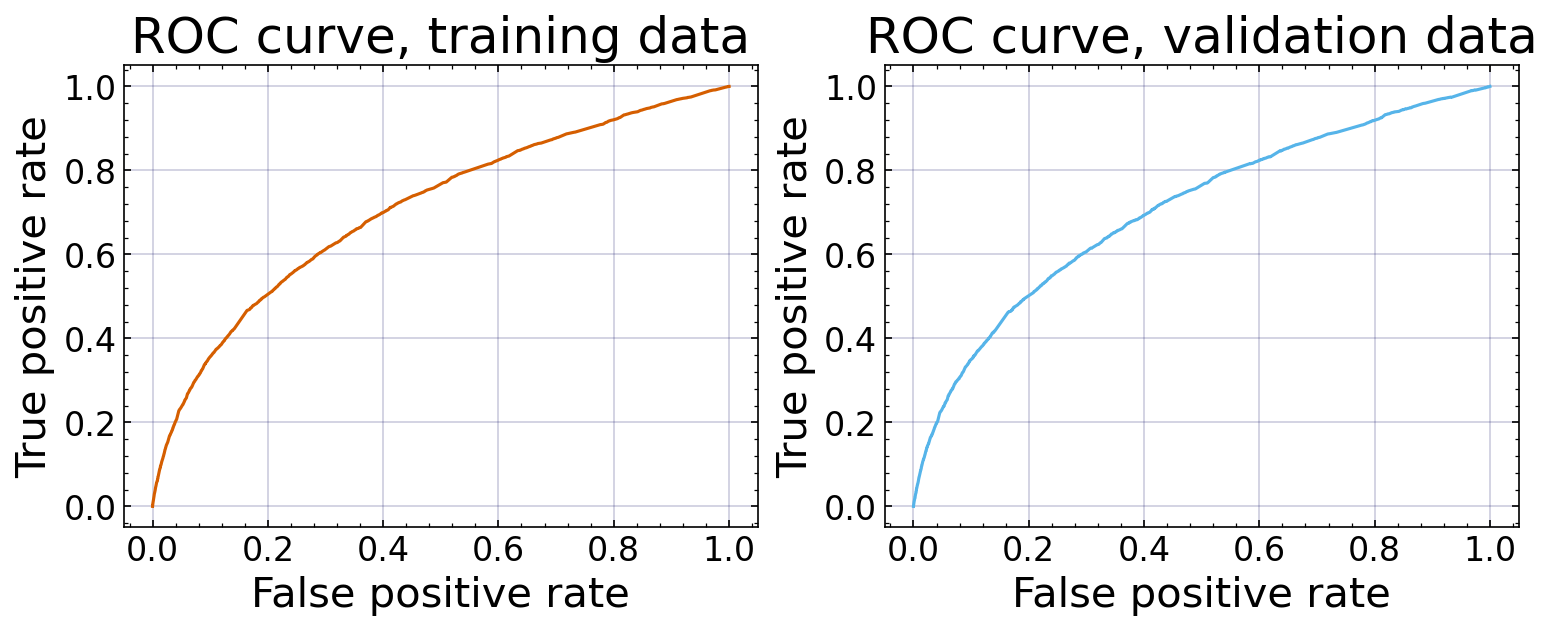

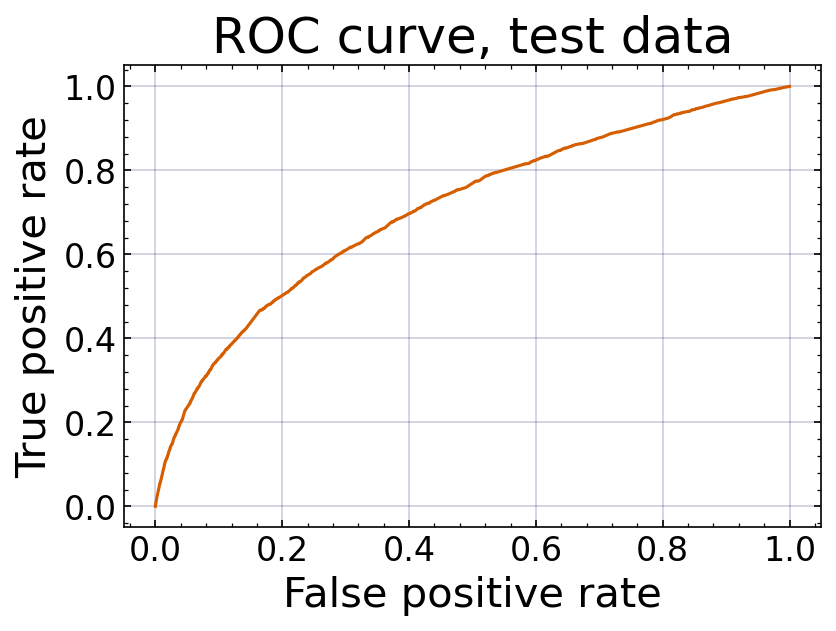

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, random_split
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
from tqdm import tqdm



df_ttbar = pd.read_csv('CMS_ttbar_data_afternoon.csv')
df_tprime = pd.read_csv('CMS_tprime_signal.csv')

df_sim = df_ttbar[df_ttbar['label'] != 0]
df_all_sim = pd.concat([df_sim, df_tprime])

df_all_sim['binary_label'] = (df_all_sim['label'] == 6).astype(int)

features_to_drop = ['weight', 'label', 'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b', 'top_jet_mass']
X = df_all_sim.drop(columns=features_to_drop + ['binary_label'])
y = df_all_sim['binary_label']

X_torch = torch.tensor(X.values).float()
y_torch = torch.tensor(y.values).float()

## SPLITTING DATASET AND MAKING DLOADER ##
dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_validate, dataset_test = random_split(dataset, lengths = [0.6,0.2,0.2], generator = torch.Generator().manual_seed(2)) # Split dataset into separate datasets for training & testing

dloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
dloader_validate = DataLoader(dataset_validate, batch_size = 32, shuffle = True)   # keep batch size as power of 2 so training calculations are faster
#dloader_test = DataLoader(dataset_test, batch_size = 128, shuffle = False)



# DEFINE AND MODEL HYPERPARAMETERS
hidden_neurons = [10, 30]
activ_functions = {'sigmoid':nn.Sigmoid(), 'relu':nn.ReLU()}
learning_rates = [0.001, 0.01]

loss_fcn = nn.BCELoss(reduction='sum')
best_val_acc = 0
best_roc = 0

results_df = pd.DataFrame(columns=['hidden_neurons',
                                   'activ_functions',
                                   'learning_rate',
                                   'train_accuracy',
                                   'validation_accuracy',
                                   'validation_roc_score'])


def train_epoch(model, optimizer, epoch):
    model.train()
    tot_loss = 0
    valid_loss = 0

    loop = tqdm(dloader_train, desc=f"Epoch {epoch+1}", leave=False)
    for X_train, y_train in loop:
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
  
    model.eval()
    for X_valid, y_valid in dloader_validate:
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid.reshape(-1,1))
        valid_loss += vloss.detach()

    return tot_loss/len(dataset_train), valid_loss/len(dataset_validate)



num_models = len(hidden_neurons) * len(activ_functions) * len(learning_rates)
cols = 3
rows = (num_models + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), dpi=150)
axs = axs.flatten()
model_idx = 0


# TRAINING LOOP
for n in hidden_neurons:
    for key in activ_functions.keys():
        for lr in learning_rates:
            torch.manual_seed(1)
            input_features = X.shape[1]
            model = nn.Sequential(nn.Linear(input_features, n),
                                            activ_functions[key],
                                            nn.Linear(n, 1),
                                            nn.Sigmoid())               # End with sigmoid to normalise output for classification
            optimizer = torch.optim.SGD(model.parameters(), lr = lr)

            tloss, vloss = [], []
            for i in range(10):
                train_loss, valid_loss = train_epoch(model, optimizer,i)
                tloss.append(train_loss)
                vloss.append(valid_loss)
            
        
            X_train = torch.vstack([dataset_train[i][0] for i in range(len(dataset_train))])
            y_train = torch.vstack([dataset_train[i][1] for i in range(len(dataset_train))])
            X_valid = torch.vstack([dataset_validate[i][0] for i in range(len(dataset_validate))])
            y_valid = torch.vstack([dataset_validate[i][1] for i in range(len(dataset_validate))])
            X_test = torch.vstack([dataset_test[i][0] for i in range(len(dataset_test))])
            y_test = torch.vstack([dataset_test[i][1] for i in range(len(dataset_test))])

            train_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_train)]).reshape(y_train.shape)
            valid_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_valid)]).reshape(y_valid.shape)
            train_acc = accuracy_score(y_train, train_pred)
            valid_acc = accuracy_score(y_valid, valid_pred)
            valid_roc = roc_auc_score(y_valid.detach().numpy(), model(X_valid).detach().numpy())
        
            if valid_acc > best_val_acc:
                best_val_acc = valid_acc
                np.save('best_toy_nn_losses.npy',np.array([tloss, vloss]))
                torch.save(model, 'best_toy_nn_model.pt')

            if valid_roc > best_roc:
                best_roc = valid_roc
                np.save('best_toy_nn_losses.npy',np.array([tloss, vloss]))
                torch.save(model, 'best_toy_nn_model.pt')
                
            model_df = pd.DataFrame(np.array([[n, key, lr, train_acc, valid_acc, valid_roc]]), columns = results_df.columns)
            results_df = pd.concat([results_df, model_df])

            print(f"Model {model_idx+1}/{num_models}: n={n}, {key}, lr={lr}, train_acc={train_acc:.3f}, valid_acc={valid_acc:.3f}, valid_roc={valid_roc:.3f}")


            ## TRAINING AND VALIDATION LOSS PLOT ##
            ax = axs[model_idx]
            ax.plot(tloss, color='black', label='Train loss')
            ax.plot(vloss, color='#D55E00', label='Valid loss')
            ax.set_title(f'n={n}, {key}, lr={lr}', fontsize=10)
            ax.tick_params(labelsize=8)
            ax.grid(alpha=0.3)
            ax.legend()
            model_idx += 1



for i in range(model_idx, len(axs)):
    axs[i].axis('off')

fig.tight_layout()
plt.show()


# BEST MODEL
## Load best performing model and its training/validation losses, calculate/plot performance metrics ##

model = torch.load('best_toy_nn_model.pt', weights_only=False) #NEED THE WEIGHTS ONLY PART!!!!
tloss, vloss = np.load('best_toy_nn_losses.npy')

train_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_train)]).reshape(y_train.shape)
valid_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_valid)]).reshape(y_valid.shape)

train_acc = accuracy_score(y_train, train_pred)
valid_acc = accuracy_score(y_valid, valid_pred)

print('Train accuracy = {:.1f}%'.format(train_acc*100))
print('Validation accuracy = {:.1f}%'.format(valid_acc*100))

train_roc = roc_auc_score(y_train.detach().numpy(), model(X_train).detach().numpy())
valid_roc = roc_auc_score(y_valid.detach().numpy(), model(X_valid).detach().numpy())
                          
train_fpr, train_tpr, train_thresholds = roc_curve(y_train.detach().numpy(), model(X_train).detach().numpy())
valid_fpr, valid_tpr, valid_thresholds = roc_curve(y_valid.detach().numpy(), model(X_valid).detach().numpy())
                          
fig, axs = plt.subplots(1,2,figsize = (12, 4), dpi = 150)
axs[0].plot(train_fpr, train_tpr, color='#D55E00', label = 'Training')
axs[1].plot(valid_fpr, valid_tpr, color='#56B4E9', label = 'Validation')
axs[0].set_title('ROC curve, training data',fontsize = 24)
axs[1].set_title('ROC curve, validation data',fontsize = 24)

for ax in axs:
    ax.set_xlabel('False positive rate',fontsize = 20)
    ax.set_ylabel('True positive rate',fontsize = 20)
    ax.xaxis.set_minor_locator(MultipleLocator(0.04))
    ax.yaxis.set_minor_locator(MultipleLocator(0.04))
    ax.tick_params(which='both',direction='in',top=True,right=True,labelsize = 16)
    ax.grid(color='xkcd:dark blue',alpha = 0.2)


print('Training ROC-AUC score = {:.3f}'.format(train_roc))
print('Validation ROC-AUC score = {:.3f}'.format(valid_roc))

test_accuracy = (torch.Tensor([0 if x < 0.5 else 1 for x in model(X_test)]).reshape(y_test.shape)==y_test).sum()/len(X_test)
print("Test accuracy = {:.1f}%".format(test_accuracy*100))

## Test ROC-AUC curve ##
roc_score = roc_auc_score(y_true = y_test.detach().numpy(),
                          y_score = model(X_test).detach().numpy())


fpr, tpr, thresholds = roc_curve(y_true = y_test.detach().numpy(),
                                 y_score = model(X_test).detach().numpy())

fig, ax = plt.subplots(1,1,figsize = (6, 4), dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 20)
ax.set_ylabel('True positive rate',fontsize = 20)
ax.set_title('ROC curve, test data',fontsize = 24)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',direction='in',top=True,right=True,labelsize = 16)
ax.grid(color='xkcd:dark blue',alpha = 0.2)

print('ROC score = {:.5f}'.format(roc_score))


<div style="background-color: #FFEEEC">

## QUESTION 5.3 [^](#outline)

In question 5.2, you built, trained and tested a classifier for our data using a neural network. For this method discuss the following.
    
Based on the results you have shown, which architecture and hyperparameter values would you choose to best classify the data for each method? Include your chosen values in your answer and explain why you choose those values. Refer back to any plots and data you have produced above. Your answer should include:    
* The performance metrics you used and how you interpeted them.
* Training vs Test loss and a justification for why your chosen algorithm has not been overfit.  
* Which values you chose for the hyperparameters and why. 
* The advantages and disdavantages of the method for the data.
* A ROC curve for the best set of hyperparameters.

[10 marks]
    


I varied 3 architecture/hyperparameters: the learning rate (lr), the choice of activation function used (sigmoid or relu) and the number of hidden neurons (n)

For each hyperparameter combination, I recorded 2 performance metrics: the accuracy and  ROC-AUC score. Accuracy measures how many predictions the classifier got correct out of all the predictions made and the ROC-AUC measures the area under the ROC curve which is a plot of the true positive rate against the false positive rate as the classification threshold is varied. A higher accuracy and ROC-AUC score indicates a better ability to classify between classses. 

Since we split the data into training, validation and test datasets, where the accuracy and ROC_AUC score were calculated from the validation data. It is appropriate to use both metrics to consider which set of hyperparameters would give the best model. Maximising both corresponds to the hyperparameters:

- n=30
- sigmoid
- lr=0.001

Looking at the training and validation loss curves above, we can see that not many of the models tested have actually managed to learn. For our best model choice, the curves do show that the model is learning since both losses are decreasing. This graph also indicates that the model is not over-fitting because the validation loss curve remains parallel to the training loss curve. If it were overfitting, the training loss curve would continue to decrease while the validation curve would begin to increase - the training data is being memorised. In fact, our model is underfitting, we should continue to train for more epochs in order to improve our metrics.

The advantages of this method for the data is its flexibility, if new physics were to appear, the same network can be retrained easily. However, a big disadvantage is that training a neural network is computationally expensive. 




ROC score = 0.70802


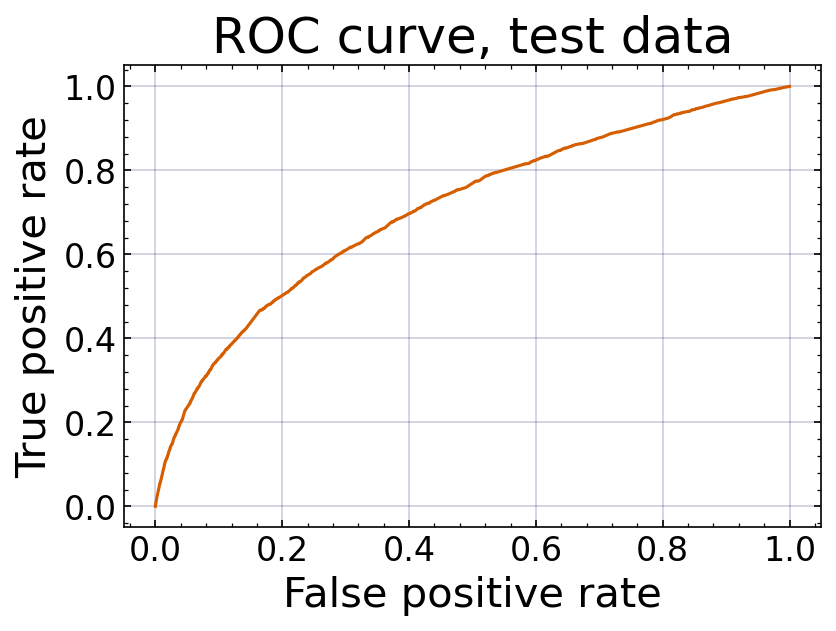

In [27]:
## Test ROC-AUC curve ##
roc_score = roc_auc_score(y_true = y_test.detach().numpy(),
                          y_score = model(X_test).detach().numpy())


fpr, tpr, thresholds = roc_curve(y_true = y_test.detach().numpy(),
                                 y_score = model(X_test).detach().numpy())

fig, ax = plt.subplots(1,1,figsize = (6, 4), dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 20)
ax.set_ylabel('True positive rate',fontsize = 20)
ax.set_title('ROC curve, test data',fontsize = 24)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',direction='in',top=True,right=True,labelsize = 16)
ax.grid(color='xkcd:dark blue',alpha = 0.2)

print('ROC score = {:.5f}'.format(roc_score))


<hr style="border:2px solid gray">


<div style="background-color: #FFEEEC">

# QUESTION 6 [^](#outline)
In this question we will carry out a hypothesis test to see if our data is more compatible with the null hypothesis ($H_{0}$), where only SM processes (labels 1 to 5) contained in `CMS_ttbar_data_afternoon.csv` are present, or the alternate hypothesis ($H_{1}$) where both the SM processes and the BSM `Tprime` process contained in `CMS_tprime_signal.csv` are present.

We will first construct a test statistic comparing our observations to the expectation under these two hypotheses. Then we will use this statistic to choose which of our classifiers performs better and optimise the decision boundary. Finally we will use the events passing our requirements and our test statistic to carry out the hypothesis test on our data.

**Throughout this question remember to account for the weights for the simulated events.**

[TOTAL MARKS 15]

<div style="background-color: #FFEEEC">

## QUESTION 6.1 [^](#outline)

(i) Write a function that calculates the binned log-likelihood comparing the expected and observed counts of events in a histogram binned in the **invariant mass variable**, assuming the observations are Poisson-distributed in each bin. The function should take as input the observed histogram and a predicted histogram, with each bin containing the sum of weights in the bin. 

(ii) Write a function that will return the log-likelihood ratio,  $\ln \left(L(H_{1})/L(H_{0})\right)$,  using your function from part (i)  for a given observed histogram and the expected histograms of two hypotheses; $H_{0}$ and $H_1$. You should make sure that the function rounds observed counts to the nearest integer if the observed histogram counts given to the function are non-integer values. 

(iii) Write a function that returns the predicted histogram under the null hypothesis ($H_{0}$) for a configurable decision boundary on each of your classifiers, remembering for now to only use the simulated events, not the data. You should not use any simulated event that has been used to train the classifier, and adjust the weights of all remaining events accordingly. 

(iv) Write a function that returns the predicted histogram under the alternate hypothesis ($H_{1}$) for a configurable decision boundary on each of your classifiers, remembering for now to only use the simulated events, not the data. You should not use any simulated event that has been used to train the classifier, and adjust the weights of all remaining events accordingly.

(v)  Write a function that returns the observed histogram from the data events for a configurable decision boundary on each of your classifiers, remembering now to only use the data events, not the simulation.

[7 marks]

In [28]:
#i) 
def binned_log_likelihood(observed, expected):

    observed = np.round(observed) 
    expected = np.clip(expected, 1e-10, None)  # prevent log(0)

    return np.sum(observed * np.log(expected) - expected)

In [29]:
#ii)

def log_likelihood_ratio(observed, expected_H0, expected_H1):
    observed = np.round(observed)  # Make sure observed counts are integers

    logL_H0 = binned_log_likelihood(observed, expected_H0)
    logL_H1 = binned_log_likelihood(observed, expected_H1)

    return logL_H1 - logL_H0

In [30]:
#iii)

def predicted_histogram_H0(sim_data, classifier, decision_threshold, bins):

    #Select only the SM events only
    mask_SM = sim_data['label'].between(1, 5)
    selected = sim_data[mask_SM]

    #Remove irrelevant features
    features_to_drop = ['weight', 'label', 'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b', 'top_jet_mass']
    X_selected = selected.drop(columns=features_to_drop)

    #  Apply classifier to get predicted probabilities
    y_score = classifier.predict_proba(X_selected)[:, 1]

    # Apply decision threshold to get predicted labels
    passed = selected[y_score > decision_threshold]

    hist, _ = np.histogram(passed['top_jet_mass'], bins=bins, weights=passed['weight'])

    return hist



In [31]:
#iv)

def predicted_histogram_H1(sim_data, classifier, decision_threshold, bins):

    #Select both SM and BSM events 
    mask_SM_or_Tprime = sim_data['label'].between(1, 6)
    selected = sim_data[mask_SM_or_Tprime]

    #Remove irrelevant features
    features_to_drop = ['weight', 'label', 'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b', 'top_jet_mass']
    X_selected = selected.drop(columns=features_to_drop)

    y_score = classifier.predict_proba(X_selected)[:, 1]
    passed = selected[y_score > decision_threshold]

    # Get histogram
    hist, _ = np.histogram(passed['top_jet_mass'], bins=bins, weights=passed['weight'])

    return hist

In [32]:
import numpy as np

def get_observed_histogram(data_df, classifier, decision_threshold, bins):

    # Consider only real data events
    data_only = data_df[data_df["label"] == 0]

    
    features_to_drop = ['weight', 'label', 'jet1_real_b', 'jet2_real_b', 'jet3_real_b', 'jet4_real_b', 'top_jet_mass']
    X_data = data_only.drop(columns=features_to_drop)

    scores = classifier.predict_proba(X_data)[:, 1]
    passed = data_only[scores > decision_threshold]

    hist, _ = np.histogram(passed["top_jet_mass"], bins=bins)

    return hist

<div style="background-color: #FFEEEC">

## QUESTION 6.2 [^](#outline)

Your colleagues have asked you to find and optimise the sensitivity of your method using 'Asimov' datasets. The Asimov dataset for a hypothesis $H_{i}$ is produced by creating a histogram where the number of events in each bin is the closest integer to the expectation value of the Poissson distribution describing that bin assuming $H_{i}$.

(i) Without applying any selection to the data, calculate the the log-likelihood ratio, $\ln \left(L(H_{1})/L(H_{0})\right)$, for the Asimov dataset assuming $H_{1}$.

(ii) We will now carry out the same exercise as (i), with selection criteria applied. For both your best decision tree classifier and your best neural network classifier optimise the decision boundary to maximise the log-likelihood ratio obtained.

(iii) Which of your two classifiers yields the best log-likelihood ratio?

[5 marks]

iii) Decision Tree

<div style="background-color: #FFEEEC">

## QUESTION 6.3 [^](#outline)

(i) Use the classifier and decision boundary you identified in Question 6.2 to calculate the log-likelihood ratio, $\ln \left(L(H_{1})/L(H_{0})\right)$, between your two hypotheses for the real data.

(ii) The log-likelihood ratio can be assumed to be Gaussian distributed with parameters: $\mu=-1/(2\kappa^{2})$, and $\sigma=1/\kappa$, where, 
$$
\kappa=\frac{1}{\sqrt{|2t_{A}|}},
$$ 
where $t_{A}$ is the value of $\ln \left(L(H_{1})/L(H_{0})\right)$ for the Asimov dataset assuming $H_{0}$ for that classifier and threshold. Using this information, and your answer from part (i), decide whether you would reject the null hypothesis and explain your reasoning.

[3 marks]


In [28]:
# Your answer here

<hr style="border:2px solid gray">

# End of afternoon session questions 